In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

snowflow_data_fn = 'boise_river_snow2flow.csv'

In [3]:
snowflow_data_df = pd.read_csv(snowflow_data_fn)
snowflow_data_df

,datetime,prec_mm,tavg_degc,swe_mm,flow_cms
0,2000-10-01,5.08,5.0,0.00,8.693589
1,2000-10-02,0.00,2.6,0.00,9.061721
2,2000-10-03,0.00,0.9,0.00,8.806861
3,2000-10-04,0.00,1.7,0.00,8.778543
4,2000-10-05,0.00,-0.5,0.00,8.750225
...,...,...,...,...,...
9126,2025-09-26,0.00,8.9,0.00,7.674145
9127,2025-09-27,0.00,8.7,0.00,7.617510
9128,2025-09-28,0.00,11.5,0.00,7.617510
9129,2025-09-29,25.40,10.0,0.00,7.730781


In [7]:
snowflow_data_df = snowflow_data_df.set_index('datetime')
snowflow_data_df

,prec_mm,tavg_degc,swe_mm,flow_cms
datetime,,,,
2000-10-01,5.08,5.0,0.00,8.693589
2000-10-02,0.00,2.6,0.00,9.061721
2000-10-03,0.00,0.9,0.00,8.806861
2000-10-04,0.00,1.7,0.00,8.778543
2000-10-05,0.00,-0.5,0.00,8.750225
...,...,...,...,...
2025-09-26,0.00,8.9,0.00,7.674145
2025-09-27,0.00,8.7,0.00,7.617510
2025-09-28,0.00,11.5,0.00,7.617510


In [ ]:
# Create target data vector
y = snowflow_data_df.flow_cms.values
X = np.column_stack((snowflow_data_df.prec_mm.values,
     snowflow_data_df.tavg_degc.values,
     snowflow_data_df.swe_mm.values))




(9131,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(7304, 3)

In [19]:
7304/9131

0.7999123863760815

In [21]:
# 3. Create DMatrix objects for XGBoost
# DMatrix is an optimized data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [20]:
# 4. Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Objective for regression (mean squared error)
    'eval_metric': 'rmse',            # Evaluation metric (Root Mean Squared Error)
    'max_depth': 5,                   # Maximum depth of a tree
    'eta': 0.1,                       # Learning rate (step size shrinkage)
    'subsample': 0.8,                 # Subsample ratio of the training instance
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'seed': 42                        # Random seed for reproducibility
}

In [22]:
# 5. Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (trees)
model = xgb.train(params, dtrain, num_rounds)

In [23]:
# 6. Make predictions on the test set
y_pred = model.predict(dtest)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 479.2736
Root Mean Squared Error: 21.8923


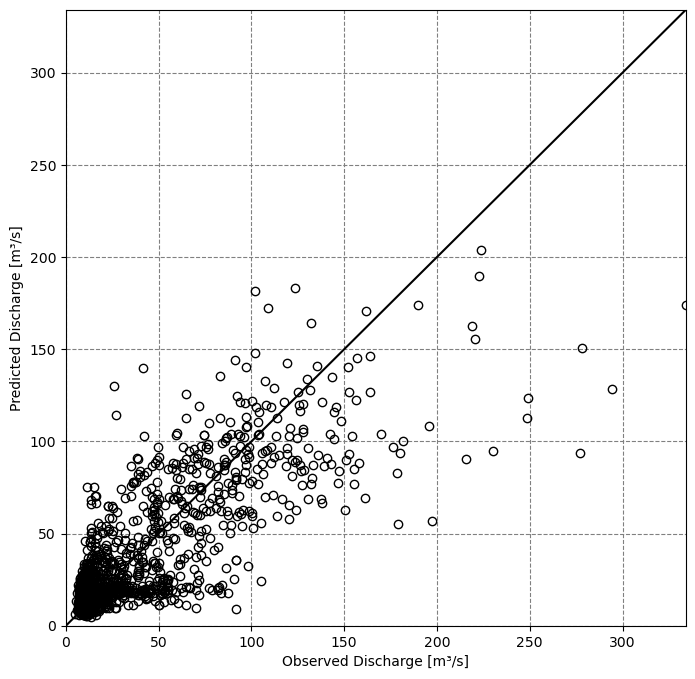

In [39]:
one2one = np.linspace(0,np.max((y_pred.max(),y_test.max())),100)

fig = plt.figure(figsize=(8,8))
plt.plot(y_test,y_pred, marker='o', markerfacecolor='None', markeredgecolor='k', linestyle='None')
plt.plot(one2one,one2one,'k-')
plt.xlim([0, one2one.max()])
plt.ylim([0, one2one.max()])
plt.grid('on',color='grey', linestyle='--')
plt.xlabel('Observed Discharge [m\u00b3/s]')
plt.ylabel('Predicted Discharge [m\u00b3/s]')
plt.show()